In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
df = pd.read_csv("data/raw/googleplaystore.csv", index_col=0)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10833 entries, 0.0 to nan
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10831 non-null  object 
 1   Category        10831 non-null  object 
 2   Rating          9361 non-null   object 
 3   Reviews         10831 non-null  float64
 4   Size            10831 non-null  object 
 5   Installs        10831 non-null  object 
 6   Type            10831 non-null  object 
 7   Price           10831 non-null  object 
 8   Content Rating  10831 non-null  object 
 9   Genres          10831 non-null  object 
 10  Last Updated    10831 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10831 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


# Limpieza duplicados y Rating

In [4]:
df.loc[df["Reviews"]==0,"Rating"]=0.0

In [5]:
df.sort_values(by="App", inplace=True)
df.reset_index(inplace=True,drop=True)

In [6]:
for i in range(0,len(df)):
    if i==0:
        continue
    if df.loc[i,"App"]==df.loc[(i-1),"App"] and df.loc[i,"Category"]==df.loc[(i-1),"Category"]:
        df.loc[i,"duplicado"]=1
    else:
        df.loc[i,"duplicado"]=0

In [7]:
len(df[df["duplicado"]==1])

1074

In [8]:
df.drop(df[df["duplicado"]==1].index,axis=0, inplace=True)

In [9]:
df.drop("duplicado",axis=1,inplace=True)

In [10]:
df.drop(df[df["Rating"].isna()].index,axis=0, inplace=True)

In [11]:
df["Rating"] = np.where(df["Rating"].str.contains(","),df["Rating"].str.replace(",","."),df["Rating"])
df.loc[df["Rating"].isna(),"Rating"]=0
df["Rating"]=df["Rating"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8888 entries, 1 to 10830
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8888 non-null   object 
 1   Category        8888 non-null   object 
 2   Rating          8888 non-null   float64
 3   Reviews         8888 non-null   float64
 4   Size            8888 non-null   object 
 5   Installs        8888 non-null   object 
 6   Type            8888 non-null   object 
 7   Price           8888 non-null   object 
 8   Content Rating  8888 non-null   object 
 9   Genres          8888 non-null   object 
 10  Last Updated    8888 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8888 non-null   object 
dtypes: float64(2), object(11)
memory usage: 972.1+ KB


In [12]:
df.reset_index(drop=True,inplace=True)

# Limpieza Installs, variable objetivo, generamos nueva variable objetivo categórica

In [13]:
df["Installs"]=df["Installs"].str.replace(",","")
df["Installs"]=df["Installs"].str.replace("+","")
df["Installs"]=df["Installs"].astype(int)

(array([  74.,  357.,  557.,  929., 1417., 1556., 1936., 1584.,  429.,
          49.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

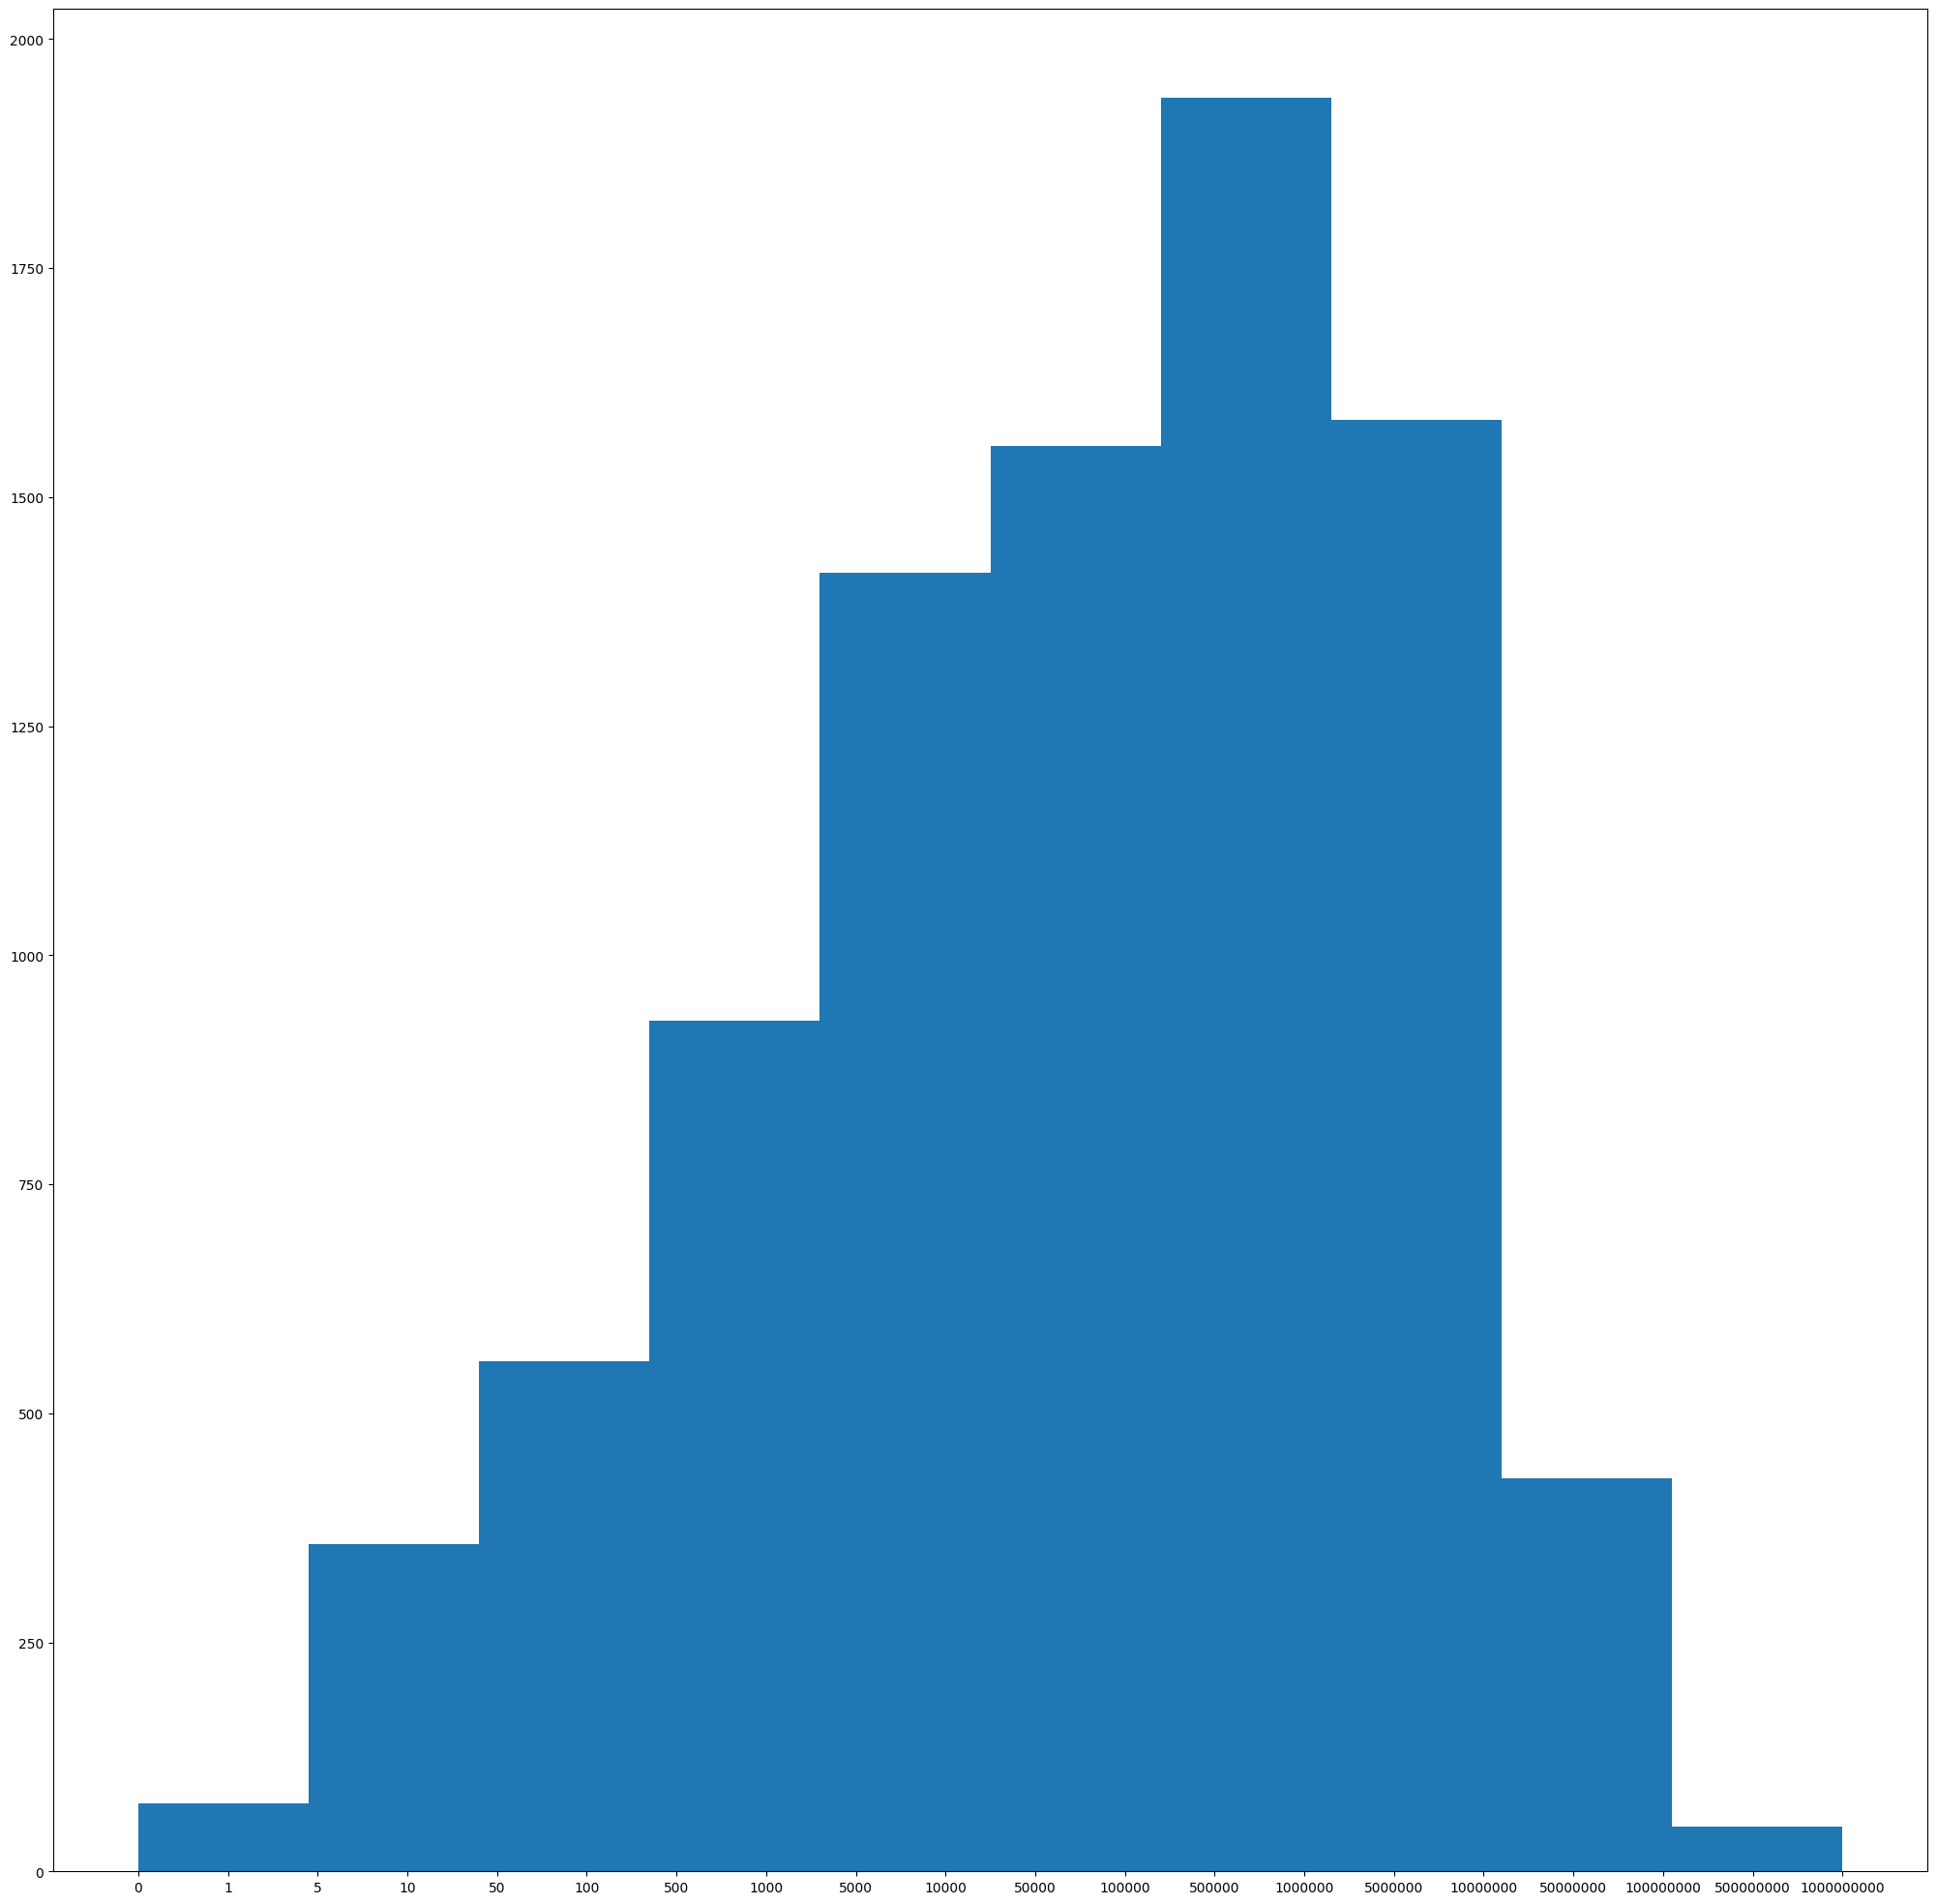

In [14]:
plt.figure(figsize=(25,25))
plt.hist(df[["Installs"]].sort_values(by="Installs").astype(str))

In [15]:
for i,j in enumerate(list(df["Installs"].sort_values().unique())):
    df.loc[df["Installs"]==j, "Descargas"] = i

In [16]:
df.loc[df["Installs"]>=0,"Descargas2"]=0
df.loc[df["Installs"]>=1000,"Descargas2"]=1
df.loc[df["Installs"]>=10000,"Descargas2"]=2
df.loc[df["Installs"]>=100000,"Descargas2"]=3
df.loc[df["Installs"]>=1000000,"Descargas2"]=4
df.loc[df["Installs"]>=10000000,"Descargas2"]=5
df["Descargas2"].value_counts()

Descargas2
4.0    2050
3.0    1605
2.0    1449
5.0    1440
0.0    1209
1.0    1135
Name: count, dtype: int64

In [17]:
df["Descargas3"] = np.where((df["Descargas2"] == 0) | (df["Descargas2"] == 1), 0,
                           np.where((df["Descargas2"] == 2) | (df["Descargas2"] == 3), 1,
                                    np.where((df["Descargas2"] == 4) | (df["Descargas2"] == 5), 2, df["Descargas2"])))

# Categoría, ordenada en función de la media con descargas

In [18]:
for i,j in enumerate(list(df.groupby("Category")["Descargas3"].mean().sort_values().index)):
    df.loc[df["Category"]==j,"Categoria"]=i

In [19]:
df.groupby("Categoria")["Descargas2"].mean().sort_values()

Categoria
0.0     1.360795
1.0     1.666667
2.0     1.677419
3.0     2.155689
4.0     2.183007
6.0     2.369231
5.0     2.371728
8.0     2.394495
9.0     2.422713
7.0     2.467532
10.0    2.477273
14.0    2.609091
12.0    2.630262
13.0    2.641732
11.0    2.677419
15.0    2.702941
17.0    2.759259
16.0    2.776119
19.0    2.795082
22.0    2.820000
18.0    2.824561
20.0    2.881119
23.0    2.885572
21.0    2.944186
24.0    3.038835
25.0    3.119403
26.0    3.274510
27.0    3.376344
28.0    3.466667
29.0    3.563433
30.0    3.577825
31.0    3.625000
32.0    4.184466
Name: Descargas2, dtype: float64

In [20]:
df.groupby("Category")["Categoria"].mean()

Category
ART_AND_DESIGN         11.0
AUTO_AND_VEHICLES       7.0
BEAUTY                 10.0
BOOKS_AND_REFERENCE     5.0
BUSINESS                2.0
COMICS                 17.0
COMMUNICATION          20.0
DATING                  4.0
EDUCATION              31.0
ENTERTAINMENT          32.0
EVENTS                  1.0
FAMILY                 12.0
FINANCE                 9.0
FOOD_AND_DRINK         24.0
GAME                   30.0
HEALTH_AND_FITNESS     16.0
HOUSE_AND_HOME         25.0
LIBRARIES_AND_DEMO      6.0
LIFESTYLE               3.0
MAPS_AND_NAVIGATION    19.0
MEDICAL                 0.0
NEWS_AND_MAGAZINES     14.0
PARENTING              22.0
PERSONALIZATION         8.0
PHOTOGRAPHY            29.0
PRODUCTIVITY           15.0
SHOPPING               27.0
SOCIAL                 21.0
SPORTS                 18.0
TOOLS                  13.0
TRAVEL_AND_LOCAL       23.0
VIDEO_PLAYERS          26.0
WEATHER                28.0
Name: Categoria, dtype: float64

# Tamaño del archivo

In [21]:
df["tamaño"] = np.where(df["Size"].str.contains("k"), df["Size"].str.replace("k",""), np.where(df["Size"].str.contains("M"), df["Size"].str.replace("M",""), np.where(df["Size"].str.contains("Varies with device"), df["Size"].str.replace("Varies with device","0"), df["Size"])) )
df["tamaño"]=df[["tamaño"]].astype(float)
df["tamaño"]=np.where(df["Size"].str.contains("M"),df["tamaño"]*1000,df["tamaño"] )

In [22]:
df.corr(numeric_only=True)

,Rating,Reviews,Installs,Descargas,Descargas2,Descargas3,Categoria,tamaño
Rating,1.000000,0.058846,0.057409,0.501168,0.428890,0.374358,0.140009,0.076588
Reviews,0.058846,1.000000,0.602425,0.221950,0.176930,0.142127,0.087760,0.074703
Installs,0.057409,0.602425,1.000000,0.277133,0.212514,0.171493,0.085608,0.001531
Descargas,0.501168,0.221950,0.277133,1.000000,0.975111,0.918457,0.321353,0.160586
Descargas2,0.428890,0.176930,0.212514,0.975111,1.000000,0.953013,0.325653,0.164124
Descargas3,0.374358,0.142127,0.171493,0.918457,0.953013,1.000000,0.310668,0.161017
Categoria,0.140009,0.087760,0.085608,0.321353,0.325653,0.310668,1.000000,0.156734
tamaño,0.076588,0.074703,0.001531,0.160586,0.164124,0.161017,0.156734,1.000000


#### Apenas hay correlación, vamos a agrupar las apps por su tamaño en  grupos y para los que no conocemos el tamaño le pondremos 0, despues reasignaremos el orden de los grupos en función de la media de descargas

In [23]:
df.loc[df["tamaño"]==0, "tamaño2"]=0
df.loc[df["tamaño"]>0, "tamaño2"]=1
df.loc[df["tamaño"]>3500, "tamaño2"]=2
df.loc[df["tamaño"]>7000, "tamaño2"]=3
df.loc[df["tamaño"]>13000, "tamaño2"]=4
df.loc[df["tamaño"]>25000, "tamaño2"]=5
df.loc[df["tamaño"]>45000, "tamaño2"]=6
df.groupby("tamaño2")["Descargas3"].mean().sort_values()

tamaño2
1.0    0.696679
2.0    0.859289
3.0    0.967025
4.0    1.131969
5.0    1.168704
6.0    1.492195
0.0    1.688871
Name: Descargas3, dtype: float64

In [24]:
df["tamaño2"]= np.where(df["tamaño2"]==0, 6, 
                        np.where(df["tamaño2"]==1, 0,
                                 np.where(df["tamaño2"]==2, 1,
                                          np.where(df["tamaño2"]==3, 2,
                                                   np.where(df["tamaño2"]==4, 3,
                                                            np.where(df["tamaño2"]==5, 4,
                                                                     np.where(df["tamaño2"]==6, 5,df["tamaño2"])))))))

In [25]:
df.groupby("tamaño2")["Descargas3"].mean()

tamaño2
0.0    0.696679
1.0    0.859289
2.0    0.967025
3.0    1.131969
4.0    1.168704
5.0    1.492195
6.0    1.688871
Name: Descargas3, dtype: float64

# Type y Price, es prácticamente la misma variable

In [26]:
df.loc[df["Type"]=="Free","Gratuito"]=1
df.loc[df["Type"]=="Paid","Gratuito"]=0

In [27]:
df["Price"]=df["Price"].str.replace("$","").copy()
df["Price"]=df["Price"].astype(float).copy()

In [28]:
df[["Descargas", "Descargas2","Descargas3","Categoria","tamaño","tamaño2","Gratuito","Price"]].corr()

,Descargas,Descargas2,Descargas3,Categoria,tamaño,tamaño2,Gratuito,Price
Descargas,1.000000,0.975111,0.918457,0.321353,0.160586,0.404644,0.252940,-0.065674
Descargas2,0.975111,1.000000,0.953013,0.325653,0.164124,0.410562,0.250532,-0.059310
Descargas3,0.918457,0.953013,1.000000,0.310668,0.161017,0.393163,0.250240,-0.060239
Categoria,0.321353,0.325653,0.310668,1.000000,0.156734,0.202110,0.055452,-0.047355
tamaño,0.160586,0.164124,0.161017,0.156734,1.000000,0.431035,0.012655,-0.017185
tamaño2,0.404644,0.410562,0.393163,0.202110,0.431035,1.000000,0.056189,-0.040778
Gratuito,0.252940,0.250532,0.250240,0.055452,0.012655,0.056189,1.000000,-0.225613
Price,-0.065674,-0.059310,-0.060239,-0.047355,-0.017185,-0.040778,-0.225613,1.000000


# Tipo de contenido (EDAD/PUBLICO)

In [29]:
df["Content Rating"].value_counts()

Content Rating
Everyone           7187
Teen                983
Mature 17+          374
Everyone 10+        340
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [30]:
df[df["Content Rating"]=="Adults only 18+"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Descargas,Descargas2,Descargas3,Categoria,tamaño,tamaño2,Gratuito
3103,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017.0,41M,1000000,Free,0.0,Adults only 18+,Sports,24-Jul-18,3.21.324,4.4 and up,13.0,4.0,2.0,18.0,41000.0,4.0,1.0
5473,Manga Books,COMICS,3.8,7326.0,Varies with device,500000,Free,0.0,Adults only 18+,Comics,3-Aug-18,Varies with device,Varies with device,12.0,3.0,1.0,17.0,0.0,6.0,1.0
5475,Manga Master - Best manga & comic reader,COMICS,4.6,24005.0,4.9M,500000,Free,0.0,Adults only 18+,Comics,4-Jul-18,1.1.7.0,4.1 and up,12.0,3.0,1.0,17.0,4900.0,1.0,1.0


In [31]:
df.drop(df[df["Content Rating"]=="Adults only 18+"].index,axis=0,inplace=True)
df.drop(df[df["Content Rating"]=="Unrated"].index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [32]:
for i,j in enumerate(list(df.groupby("Content Rating")["Descargas3"].mean().sort_values().index)):
    df.loc[df["Content Rating"]==j,"tipo_contenido"]=i

In [33]:
df.groupby("Content Rating")["tipo_contenido"].mean()

Content Rating
Everyone        0.0
Everyone 10+    3.0
Mature 17+      1.0
Teen            2.0
Name: tipo_contenido, dtype: float64

In [34]:
df["Content Rating"].value_counts()

Content Rating
Everyone        7187
Teen             983
Mature 17+       374
Everyone 10+     340
Name: count, dtype: int64

In [35]:
df[["Descargas", "Descargas2","Descargas3","Categoria","tamaño","tamaño2","Gratuito","Price", "tipo_contenido"]].corr()

,Descargas,Descargas2,Descargas3,Categoria,tamaño,tamaño2,Gratuito,Price,tipo_contenido
Descargas,1.000000,0.975118,0.918491,0.321329,0.160590,0.404681,0.252916,-0.065668,0.148791
Descargas2,0.975118,1.000000,0.953029,0.325628,0.164066,0.410580,0.250528,-0.059308,0.150143
Descargas3,0.918491,0.953029,1.000000,0.310660,0.160890,0.393218,0.250243,-0.060239,0.143025
Categoria,0.321329,0.325628,0.310660,1.000000,0.156737,0.202106,0.055441,-0.047353,0.184629
tamaño,0.160590,0.164066,0.160890,0.156737,1.000000,0.431162,0.012689,-0.017194,0.208427
tamaño2,0.404681,0.410580,0.393218,0.202106,0.431162,1.000000,0.056199,-0.040787,0.178085
Gratuito,0.252916,0.250528,0.250243,0.055441,0.012689,0.056199,1.000000,-0.225609,0.027520
Price,-0.065668,-0.059308,-0.060239,-0.047353,-0.017194,-0.040787,-0.225609,1.000000,-0.015650
tipo_contenido,0.148791,0.150143,0.143025,0.184629,0.208427,0.178085,0.027520,-0.015650,1.000000


# Género de la aplicación

In [36]:
df.loc[df["Genres"]=="Music & Audio","Genres"]="Music"
for i,j in enumerate(list(range(0,len(df)))):
    df.loc[i,"Genero1"] = df.loc[i,"Genres"].split(";")[0]




In [37]:
for i,j in enumerate(list(df.groupby("Genero1")["Descargas3"].mean().sort_values().index)):
    df.loc[df["Genero1"]==j,"Genero1"]=i

In [38]:
df.groupby("Genero1")["Descargas3"].mean()

Genero1
0     0.477273
1     0.627451
2     0.677419
3     0.824497
4     0.865672
5     0.875817
6     0.917098
7     0.923077
8     0.933333
9     0.974026
10    0.987768
11    1.000000
12    1.018927
13    1.045455
14    1.046154
15    1.051724
16    1.074901
17    1.100000
18    1.105263
19    1.114706
20    1.174074
21    1.192308
22    1.196721
23    1.202091
24    1.207483
25    1.218605
26    1.220000
27    1.233831
28    1.255319
29    1.302083
30    1.315789
31    1.320388
32    1.333333
33    1.343284
34    1.384615
35    1.397129
36    1.404580
37    1.419355
38    1.428571
39    1.434783
40    1.461538
41    1.473958
42    1.480000
43    1.500000
44    1.545455
45    1.554839
46    1.584906
47    1.673077
Name: Descargas3, dtype: float64

In [39]:
df[["Descargas", "Descargas2","Descargas3","Categoria","tamaño","tamaño2","Gratuito","Price", "Genero1"]].corr()

,Descargas,Descargas2,Descargas3,Categoria,tamaño,tamaño2,Gratuito,Price,Genero1
Descargas,1.000000,0.975118,0.918491,0.321329,0.160590,0.404681,0.252916,-0.065668,0.335361
Descargas2,0.975118,1.000000,0.953029,0.325628,0.164066,0.410580,0.250528,-0.059308,0.341355
Descargas3,0.918491,0.953029,1.000000,0.310660,0.160890,0.393218,0.250243,-0.060239,0.324363
Categoria,0.321329,0.325628,0.310660,1.000000,0.156737,0.202106,0.055441,-0.047353,0.724920
tamaño,0.160590,0.164066,0.160890,0.156737,1.000000,0.431162,0.012689,-0.017194,0.308058
tamaño2,0.404681,0.410580,0.393218,0.202106,0.431162,1.000000,0.056199,-0.040787,0.261853
Gratuito,0.252916,0.250528,0.250243,0.055441,0.012689,0.056199,1.000000,-0.225609,0.021880
Price,-0.065668,-0.059308,-0.060239,-0.047353,-0.017194,-0.040787,-0.225609,1.000000,-0.038617
Genero1,0.335361,0.341355,0.324363,0.724920,0.308058,0.261853,0.021880,-0.038617,1.000000


In [40]:
df["Genero1"]=df["Genero1"].astype(int)

In [41]:
#for i,j in enumerate(list(df.groupby("Genero1")["Installs"].mean().sort_values().values)):
#    df.loc[df["Genero1"]==i,"Genero2"]=j

# Última actualización

In [42]:
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Jan"), df["Last Updated"].str.replace("Jan","01"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Feb"), df["Last Updated"].str.replace("Feb","02"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Mar"), df["Last Updated"].str.replace("Mar","03"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Apr"), df["Last Updated"].str.replace("Apr","04"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("May"), df["Last Updated"].str.replace("May","05"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Jun"), df["Last Updated"].str.replace("Jun","06"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Jul"), df["Last Updated"].str.replace("Jul","07"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Aug"), df["Last Updated"].str.replace("Aug","08"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Sep"), df["Last Updated"].str.replace("Sep","09"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Oct"), df["Last Updated"].str.replace("Oct","10"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Nov"), df["Last Updated"].str.replace("Nov","11"), df["Last Updated"])
df["Last Updated"]=np.where(df["Last Updated"].str.contains("Dec"), df["Last Updated"].str.replace("Dec","12"), df["Last Updated"])

In [43]:
for i,j in enumerate(list(range(0,len(df)))):
    df.loc[i,"Last Updated"] = "20" + df.loc[i,"Last Updated"].split("-")[2] + "-" + df.loc[i,"Last Updated"].split("-")[1] + "-" + df.loc[i,"Last Updated"].split("-")[0]

In [44]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

fecha_actual = datetime.now()

df['dias_sin_actualizar'] = (fecha_actual - df['Last Updated']).dt.days

In [45]:
df["dias_sin_actualizar"].describe()

count    8884.000000
mean     2357.309770
std       404.483282
min      2086.000000
25%      2107.000000
50%      2168.000000
75%      2431.000000
max      5087.000000
Name: dias_sin_actualizar, dtype: float64

In [46]:
df["meses_sin_actualizar"] = round(df["dias_sin_actualizar"] / 30 ,0)

In [47]:
len(df["meses_sin_actualizar"].unique())

85

In [48]:
media_ins_mes = pd.DataFrame(df.groupby("meses_sin_actualizar")["Descargas2"].mean().sort_values()).reset_index().sort_values(by="meses_sin_actualizar").reset_index(drop=True)

In [49]:
mes_count = pd.DataFrame(df["meses_sin_actualizar"].value_counts().reset_index())

In [50]:
media_ins_mes

,meses_sin_actualizar,Descargas2
0,70.0,3.440159
1,71.0,2.966856
2,72.0,2.713287
3,73.0,2.418667
4,74.0,2.209974
...,...,...
80,158.0,1.000000
81,159.0,3.000000
82,160.0,3.000000
83,161.0,2.000000


In [51]:
pd.merge(media_ins_mes,mes_count,on="meses_sin_actualizar",how="left").to_csv("prueba.csv")

In [52]:
pd.DataFrame(df["meses_sin_actualizar"].value_counts()).sort_index().to_csv("prueba.csv")

# Revisar como agrupar los meses con una distribución normal

In [53]:
for i,j in enumerate(list(media_ins_mes["meses_sin_actualizar"])):
    if media_ins_mes.loc[i,"Descargas2"]>=0:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=0
    if media_ins_mes.loc[i,"Descargas2"]>=2:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=1
    if media_ins_mes.loc[i,"Descargas2"]>=2.2:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=2
    if media_ins_mes.loc[i,"Descargas2"]>=2.4:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=3
    if media_ins_mes.loc[i,"Descargas2"]>=2.6:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=4
    if media_ins_mes.loc[i,"Descargas2"]>=3:
        df.loc[df["meses_sin_actualizar"]==j,"grupomeses"]=5


# Versión actual

In [54]:
len(df["Current Ver"].unique())

2662

In [55]:
df["version_actual"] = df["Current Ver"].str[0:2]

In [56]:
df["version_actual"] = df["version_actual"].str.replace(",","")
df["version_actual"] = df["version_actual"].str.replace(".","")
df["version_actual"] = df["version_actual"].str.replace("v","")
df["version_actual"] = df["version_actual"].str.replace("_","")
df["version_actual"] = df["version_actual"].str.replace("/","")
df["version_actual"] = df["version_actual"].str.replace("r","")

In [57]:
mask = df['version_actual'].str.contains(r'[a-zA-Z]', regex=True)
df.loc[mask, 'version_actual'] = '100'

In [58]:
df["version_actual"]=df["version_actual"].astype(int)
df["version_actual"].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,
        40,  41,  42,  43,  44,  45,  47,  48,  50,  52,  53,  54,  56,
        57,  58,  60,  65,  67,  68,  69,  70,  71,  79,  81,  85,  99,
       100])

In [59]:
df.groupby("version_actual")["Descargas3"].mean()

version_actual
0      0.711111
1      0.865837
2      1.137698
3      1.227865
4      1.364839
         ...   
79     2.000000
81     1.000000
85     0.500000
99     2.000000
100    1.643799
Name: Descargas3, Length: 66, dtype: float64

In [60]:
media_ins_act = pd.DataFrame(df.groupby("version_actual")["Descargas2"].mean().sort_values()).reset_index().sort_values(by="Descargas2").reset_index(drop=True)

In [61]:
version_count = pd.DataFrame(df["version_actual"].value_counts().reset_index())

In [62]:
pd.merge(media_ins_act,version_count,on="version_actual",how="left").to_csv("prueba.csv")

In [63]:
for i,j in enumerate(list(media_ins_act["version_actual"])):
    if media_ins_act.loc[i,"Descargas2"]>=0:
        df.loc[df["version_actual"]==j,"grupoversiones"]=0
    if media_ins_act.loc[i,"Descargas2"]>=2.2:
        df.loc[df["version_actual"]==j,"grupoversiones"]=1
    if media_ins_act.loc[i,"Descargas2"]>=3:
        df.loc[df["version_actual"]==j,"grupoversiones"]=2

In [64]:
pd.DataFrame(df.groupby("grupoversiones")["Descargas2"].mean()).reset_index()

,grupoversiones,Descargas2
0,0.0,2.137940
1,1.0,2.814653
2,2.0,3.505930


In [65]:
#for i in list(pd.DataFrame(df.groupby("grupoversiones")["Installs"].mean()).index):
#    df.loc[df["grupoversiones"]==i, "media_inst_grp_ver"] = round(pd.DataFrame(df.groupby("grupoversiones")["Installs"].mean()).iloc[int(i),:].values[0],0)
#df["media_inst_grp_ver"]=df["media_inst_grp_ver"].astype(int)

In [66]:
#for i in list(pd.DataFrame(df.groupby("grupoversiones")["Installs"].median()).index):
#    df.loc[df["grupoversiones"]==i, "mediana_inst_grp_ver"] = round(pd.DataFrame(df.groupby("grupoversiones")["Installs"].median()).iloc[int(i),:].values[0],0)
#df["mediana_inst_grp_ver"]=df["mediana_inst_grp_ver"].astype(int)

# Versión Android

In [67]:
for i,j in enumerate(list(df["Android Ver"].unique())):
    df.loc[df["Android Ver"]==j,"version_android"] = i

In [68]:
df.loc[df["version_android"]>=14,"version_android"]=14
df.loc[df["version_android"]==2,"version_android"]=3

In [69]:
version = pd.DataFrame(df.groupby("version_android")["Descargas2"].mean().sort_values().reset_index()).reset_index()

In [70]:
version

,index,version_android,Descargas2
0,0,10.0,1.760417
1,1,6.0,1.976526
2,2,14.0,2.182039
3,3,13.0,2.452261
4,4,7.0,2.462810
5,5,5.0,2.514644
6,6,8.0,2.527434
7,7,9.0,2.531051
8,8,3.0,2.604457
9,9,1.0,2.680549


In [71]:
df["version_android"] = pd.merge(df,version, on=["version_android"],how="left")["index"]

In [72]:
df["version_android"].value_counts()

version_android
9     2041
7     1256
6     1130
13     996
11     772
12     572
10     478
2      412
8      359
5      239
1      213
3      199
4      121
0       96
Name: count, dtype: int64

In [73]:
#df['med_versandroid'] = df.groupby("version_android")["Installs"].transform('mean').round()

In [74]:
df.corr(numeric_only=True)

,Rating,Reviews,Installs,Price,Descargas,Descargas2,Descargas3,Categoria,tamaño,tamaño2,Gratuito,tipo_contenido,Genero1,dias_sin_actualizar,meses_sin_actualizar,grupomeses,version_actual,grupoversiones,version_android
Rating,1.000000,0.058864,0.057431,-0.030084,0.501152,0.428881,0.374348,0.139993,0.076587,0.118232,0.028018,0.057252,0.133922,-0.044292,-0.043268,0.117074,0.059067,0.123140,0.052864
Reviews,0.058864,1.000000,0.602422,-0.008403,0.221975,0.176947,0.142144,0.087766,0.074697,0.140618,0.036394,0.090294,0.094580,-0.071365,-0.070808,0.106691,0.107486,0.095566,0.076804
Installs,0.057431,0.602422,1.000000,-0.010248,0.277164,0.212535,0.171515,0.085615,0.001514,0.167209,0.045146,0.056098,0.075821,-0.082638,-0.081667,0.123864,0.179503,0.128921,0.117398
Price,-0.030084,-0.008403,-0.010248,1.000000,-0.065668,-0.059308,-0.060239,-0.047353,-0.017194,-0.040787,-0.225609,-0.015650,-0.038617,0.001585,0.001258,-0.020560,-0.013697,-0.031017,-0.021113
Descargas,0.501152,0.221975,0.277164,-0.065668,1.000000,0.975118,0.918491,0.321329,0.160590,0.404681,0.252916,0.148791,0.335361,-0.191292,-0.189727,0.315676,0.274271,0.355300,0.220543
Descargas2,0.428881,0.176947,0.212535,-0.059308,0.975118,1.000000,0.953029,0.325628,0.164066,0.410580,0.250528,0.150143,0.341355,-0.205900,-0.204390,0.330614,0.273049,0.353712,0.227267
Descargas3,0.374348,0.142144,0.171515,-0.060239,0.918491,0.953029,1.000000,0.310660,0.160890,0.393218,0.250243,0.143025,0.324363,-0.201433,-0.200045,0.321340,0.256836,0.339214,0.219291
Categoria,0.139993,0.087766,0.085615,-0.047353,0.321329,0.325628,0.310660,1.000000,0.156737,0.202106,0.055441,0.184629,0.724920,-0.034323,-0.033761,0.091832,0.070484,0.064347,0.098170
tamaño,0.076587,0.074697,0.001514,-0.017194,0.160590,0.164066,0.160890,0.156737,1.000000,0.431162,0.012689,0.208427,0.308058,-0.153901,-0.154033,0.123785,-0.267585,-0.112512,-0.022824
tamaño2,0.118232,0.140618,0.167209,-0.040787,0.404681,0.410580,0.393218,0.202106,0.431162,1.000000,0.056199,0.178085,0.261853,-0.308992,-0.308152,0.302232,0.523809,0.348055,0.438373


<Axes: >

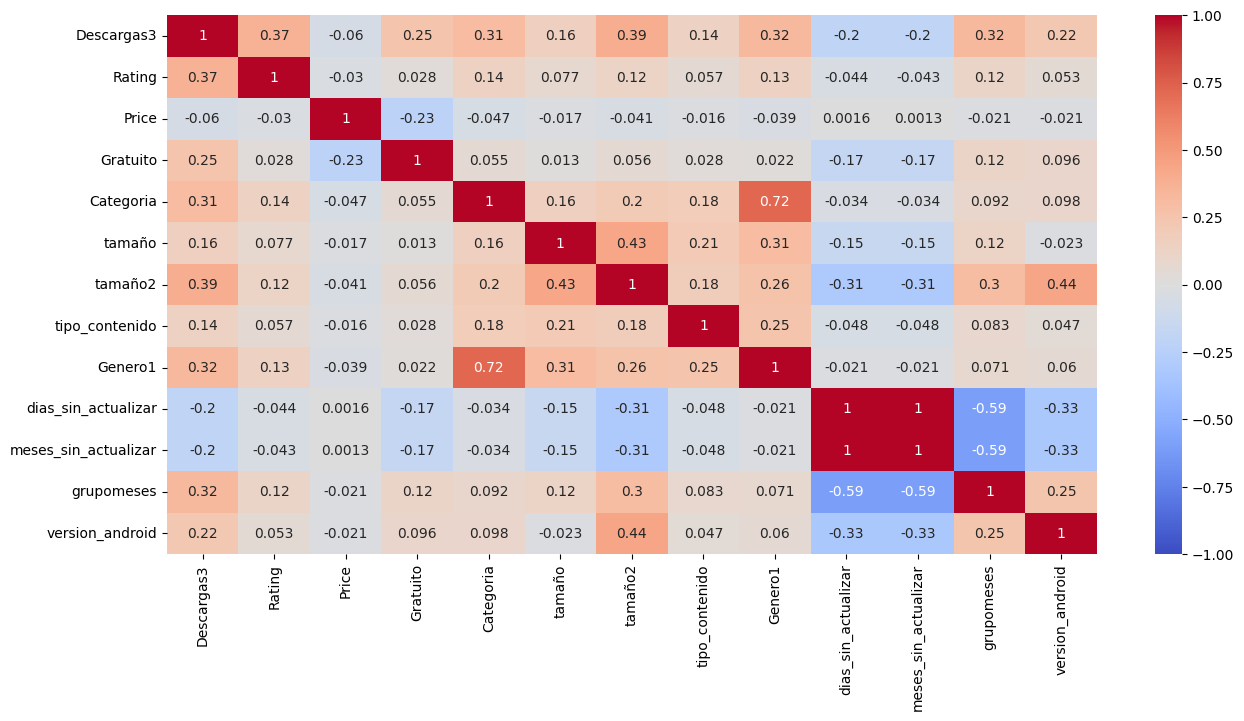

In [78]:
plt.figure(figsize=(15,7))
sns.heatmap(df[['Descargas3', 'Rating', 'Price', 'Gratuito', 'Categoria',
       'tamaño', 'tamaño2', 'tipo_contenido', 'Genero1',
       'dias_sin_actualizar', 'meses_sin_actualizar', 'grupomeses', 'version_android']].corr(), vmin=-1, annot=True, cmap="coolwarm")

In [78]:
#sns.heatmap(df[["Installs","Categoria","tamaño2", "Genero2", "grupomeses", "grupoversiones", "med_versandroid"]].corr(),vmin=-1, annot=True, cmap="coolwarm")

In [79]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,tamaño2,Gratuito,tipo_contenido,Genero1,dias_sin_actualizar,meses_sin_actualizar,grupomeses,version_actual,grupoversiones,version_android
0,#NAME?,COMICS,3.5,115.0,9.1M,10000,Free,0.00,Mature 17+,Comics,...,2.0,1.0,1.0,21,2112,70.0,5.0,5,2.0,10
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,1000000,Free,0.00,Everyone,Social,...,3.0,1.0,0.0,25,2092,70.0,5.0,5,2.0,9
2,.R,TOOLS,4.5,259.0,203k,10000,Free,0.00,Everyone,Tools,...,0.0,1.0,0.0,16,3508,117.0,3.0,1,0.0,8
3,/u/app,COMMUNICATION,4.7,573.0,53M,10000,Free,0.00,Mature 17+,Communication,...,5.0,1.0,1.0,23,2122,71.0,4.0,4,2.0,9
4,058.ba,NEWS_AND_MAGAZINES,4.4,27.0,14M,100,Free,0.00,Everyone,News & Magazines,...,3.0,1.0,0.0,17,2119,71.0,4.0,1,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8879,감성학원 BL 첫사랑,COMICS,4.4,190.0,34M,10000,Free,0.00,Everyone,Comics,...,4.0,1.0,0.0,21,2350,78.0,2.0,3,1.0,2
8880,💎 I'm rich,LIFESTYLE,3.8,718.0,26M,10000,Paid,399.99,Everyone,Lifestyle,...,4.0,0.0,0.0,4,2236,75.0,1.0,1,0.0,11
8881,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098.0,18M,1000000,Free,0.00,Everyone,Social,...,3.0,1.0,0.0,25,2101,70.0,5.0,4,2.0,7
8882,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19.0,3.2M,10000,Free,0.00,Everyone,Tools,...,0.0,1.0,0.0,16,2377,79.0,2.0,1,0.0,8


In [80]:
#df.to_csv("data/processed.csv",index=False)

In [81]:
#sns.heatmap(df[["Descargas","Categoria","tamaño","tamaño2","Gratuito", "Genero1","Genero2", "grupomeses", "med_versandroid"]].corr(),vmin=-1, annot=True, cmap="coolwarm")

In [84]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Descargas', 'Descargas2', 'Descargas3', 'Categoria',
       'tamaño', 'tamaño2', 'Gratuito', 'tipo_contenido', 'Genero1',
       'dias_sin_actualizar', 'meses_sin_actualizar', 'grupomeses',
       'version_actual', 'grupoversiones', 'version_android'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8884 entries, 0 to 8883
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   8884 non-null   object        
 1   Category              8884 non-null   object        
 2   Rating                8884 non-null   float64       
 3   Reviews               8884 non-null   float64       
 4   Size                  8884 non-null   object        
 5   Installs              8884 non-null   int32         
 6   Type                  8884 non-null   object        
 7   Price                 8884 non-null   float64       
 8   Content Rating        8884 non-null   object        
 9   Genres                8884 non-null   object        
 10  Last Updated          8884 non-null   datetime64[ns]
 11  Current Ver           8884 non-null   object        
 12  Android Ver           8884 non-null   object        
 13  Descargas         

In [83]:
df.describe()

,Rating,Reviews,Installs,Price,Last Updated,Descargas,Descargas2,Descargas3,Categoria,tamaño,tamaño2,Gratuito,tipo_contenido,dias_sin_actualizar,meses_sin_actualizar,grupomeses,version_actual,grupoversiones,version_android
count,8884.000000,8.884000e+03,8.884000e+03,8884.000000,8884,8884.000000,8884.00000,8884.000000,8884.000000,8884.000000,8884.000000,8884.000000,8884.000000,8884.000000,8884.000000,8884.000000,8884.000000,8884.000000,8884.000000
mean,3.897299,2.770003e+05,9.213812e+06,1.136415,2017-11-09 16:33:55.839712,10.661076,2.72805,1.128883,15.390140,18489.354176,2.909838,0.923570,0.378208,2357.309770,78.604570,3.198109,15.669518,0.865489,8.240657
min,0.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2086.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000,6.400000e+01,5.000000e+03,0.000000,2017-08-28 00:00:00,8.000000,1.00000,0.000000,10.000000,2900.000000,1.000000,1.000000,0.000000,2107.000000,70.000000,2.000000,1.000000,0.000000,6.000000
50%,4.200000,2.091500e+03,1.000000e+05,0.000000,2018-05-18 00:00:00,11.000000,3.00000,1.000000,13.000000,9400.000000,3.000000,1.000000,0.000000,2168.000000,72.000000,4.000000,2.000000,1.000000,9.000000
75%,4.500000,4.021450e+04,1.000000e+06,0.000000,2018-07-18 00:00:00,13.000000,4.00000,2.000000,22.000000,26000.000000,5.000000,1.000000,0.000000,2431.000000,81.000000,5.000000,5.000000,2.000000,11.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00,19.000000,5.00000,2.000000,32.000000,100000.000000,6.000000,1.000000,3.000000,5087.000000,170.000000,5.000000,100.000000,2.000000,13.000000
std,1.162368,2.112502e+06,5.817123e+07,17.510908,NaN,3.685279,1.64443,0.800022,9.017075,22208.935335,1.988676,0.265699,0.828352,404.483282,13.466315,1.668028,32.788457,0.850814,3.195204
